In [2]:
using Revise
using LilGuys
using CairoMakie, Arya

In [3]:
using Printf

In [4]:
import DataFrames: DataFrame, rename!

In [5]:
using OrderedCollections

In [6]:
using PyFITS

In [7]:
import TOML

In [8]:
CairoMakie.activate!(type=:png)

In [9]:
models_dir = "."

"."

In [10]:
sims_dir = "/astro/dboyea/dwarfs/simulations/sculptor"

"/astro/dboyea/dwarfs/simulations/sculptor"

In [11]:
function get_idx_f(name)
    return TOML.parsefile(joinpath(models_dir, "$name/orbital_properties.toml"))["idx_f"]
end

get_idx_f (generic function with 1 method)

In [12]:
function load_scalars(name) 
    path = joinpath(models_dir, "$name/profiles_scalars.fits")

    return read_fits(path)[1:get_idx_f(name), :]
end

load_scalars (generic function with 1 method)

In [13]:
function load_profiles(name) 
    path = joinpath(models_dir, "$name/profiles.hdf5")

    profs = LilGuys.read_ordered_structs(path, LilGuys.MassProfile)

    prof_i = profs[begin].second
    prof_f = profs[get_idx_f(name)].second
    return prof_i, prof_f
end

load_profiles (generic function with 1 method)

# Plotting functions

In [14]:
log_r_label = "log r / kpc"
log_rho_label = L"\log \rho"

L"$\log \rho$"

In [50]:
function compare_vcirc(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure(size=(5*72, 3.5*72))
    ax = Axis(fig[1, 1],
        xlabel=log_r_label,
        ylabel=L"$\log\,v_\textrm{circ}$ / km\,s$^{-1}$",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.r_circ_max
        y = prof.v_circ_max
        lines!(log10.(x), log10.(y*V2KMS), label=label)
    end
    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.r_circ_max
        y = prof.v_circ_max
        scatter!(log10.(x[end]), log10.(y[end]*V2KMS))
    end
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_vcirc (generic function with 1 method)

In [16]:
function compare_vcirc_time(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel="time / Gyr",
        ylabel=L"$\log\,v_\textrm{circ}$ / km\,s$^{-1}$",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, profs = profiles[i]
        x = prof.time * T2GYR
        y = prof.v_circ_max
        lines!((x), log10.(y*V2KMS), label=label)
    end
    
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_vcirc_time (generic function with 1 method)

In [33]:
function compare_boundmass_time(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel="time / Gyr",
        ylabel="log bound mass",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.time * T2GYR
        y = prof.bound_mass
        lines!((x), log10.(y), label=label)
    end
    
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_boundmass_time (generic function with 1 method)

# Particle Number

In [18]:
profiles = [
    "1e7" => load_scalars("1e7_V31_r3.2/orbit_smallperi"),
    "1e6" => load_scalars("1e6_V31_r3.2/orbit_smallperi"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


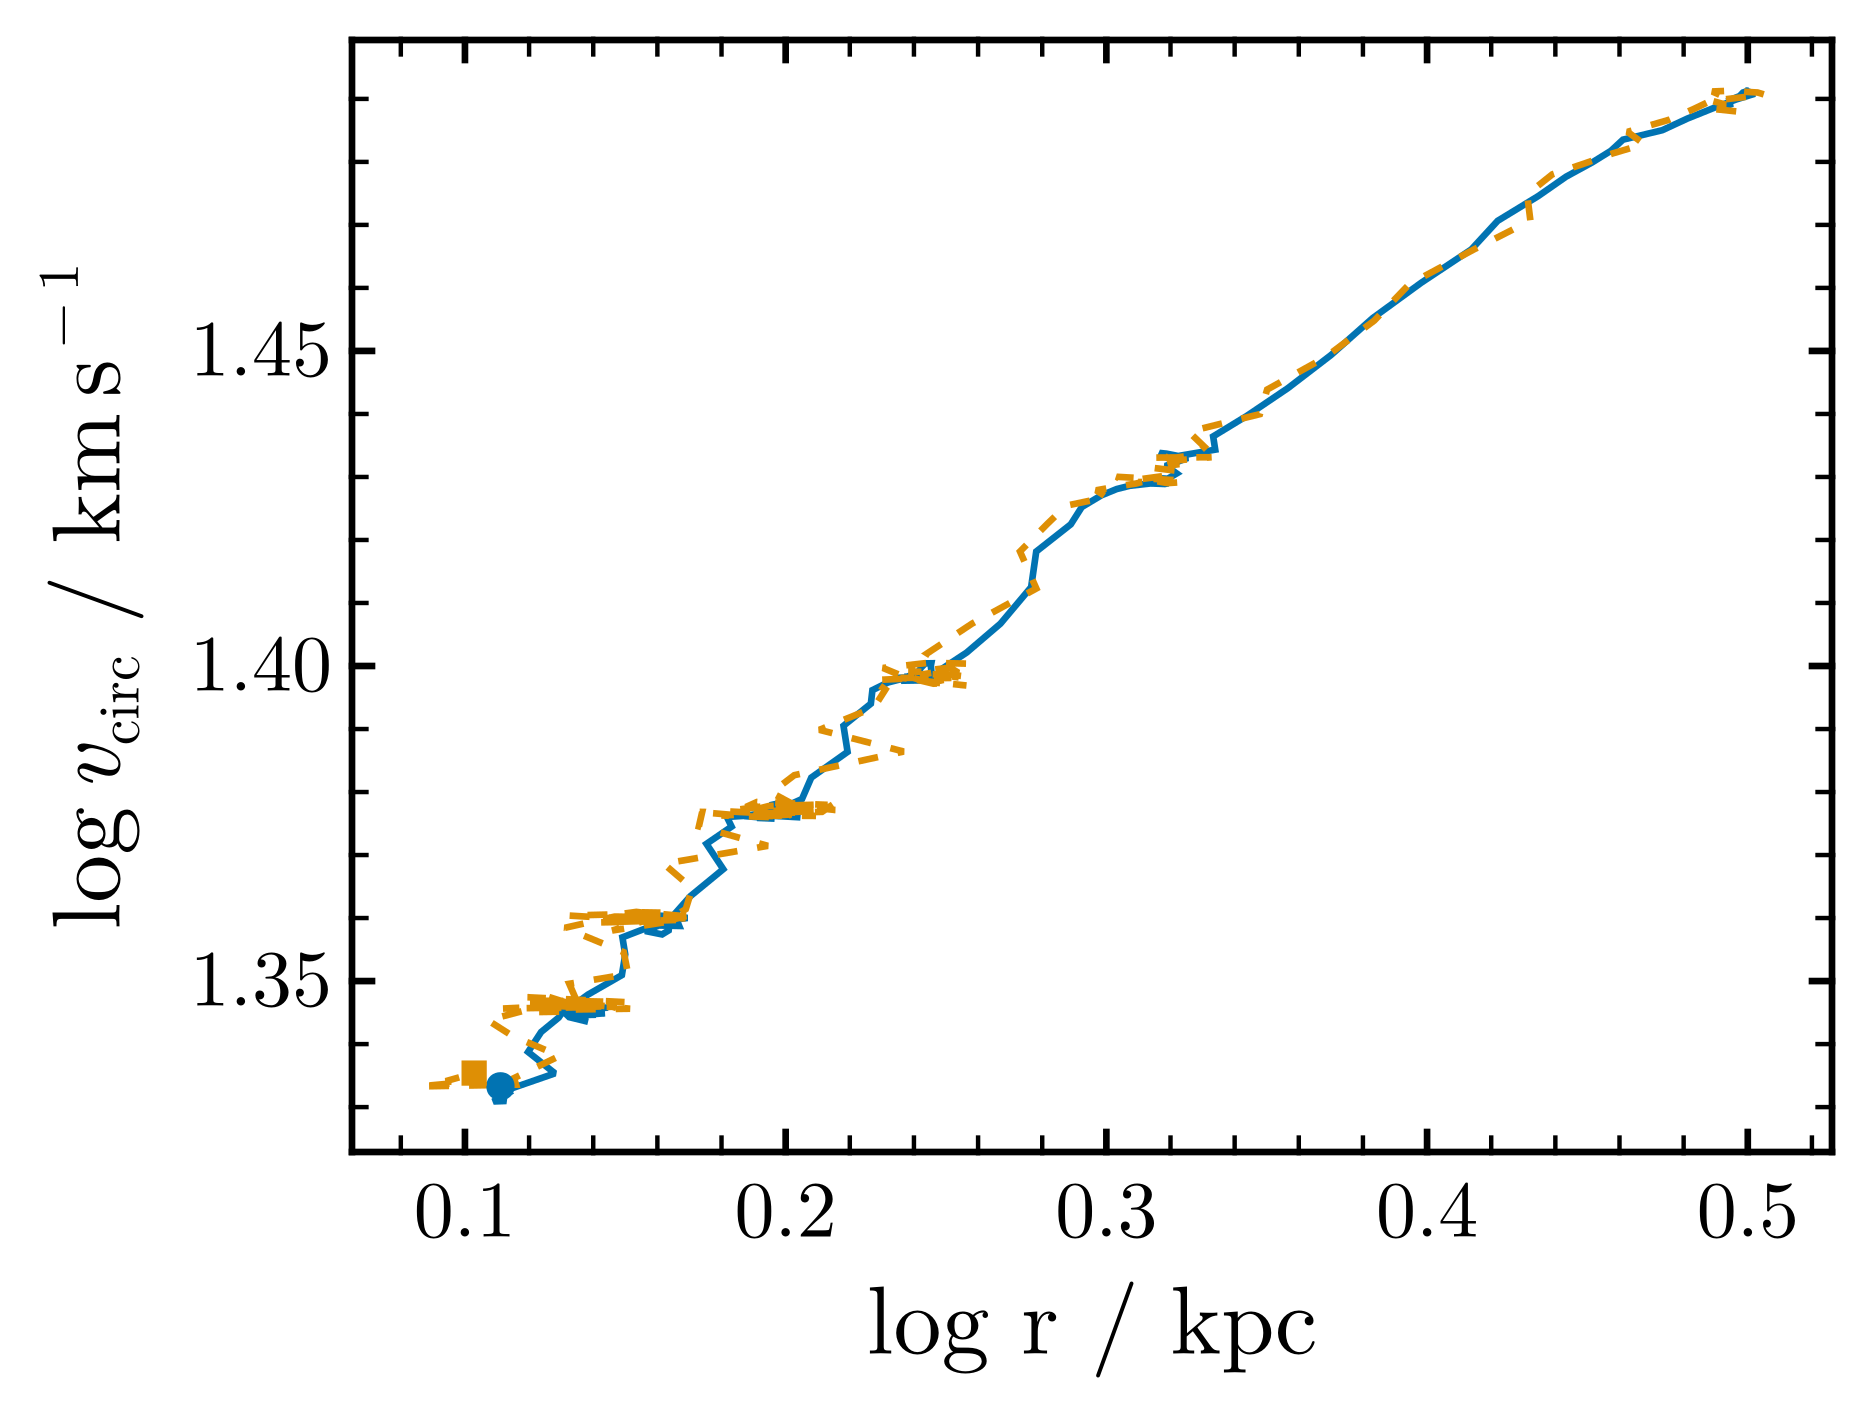

In [19]:
fig = compare_vcirc(profiles, legend=false)

In [20]:
readdir("1e7_V31_r3.2/orbit_smallperi")

26-element Vector{String}:
 "analyze.sh"
 "animate.sh"
 "centres.hdf5"
 "centres.log"
 "combined.hdf5"
 "figures"
 "jacobi.toml"
 "orbital_properties.toml"
 "paths.sh"
 "potential_halo.ini"
 "potential_stars.ini"
 "profiles.hdf5"
 "profiles.log"
 "profiles_densities.hdf5"
 "profiles_scalars.fits"
 "project_densities.sh"
 "projected_densities.hdf5"
 "projected_densities.log"
 "projected_halo.hdf5"
 "projected_halo.log"
 "projected_potential.hdf5"
 "projected_potential.log"
 "projected_stars.hdf5"
 "projected_stars.log"
 "simulation"
 "stars"

In [40]:
profiles = [
    "smallperi" => load_scalars("1e7_V31_r3.2/orbit_smallperi"),
    "mean" => load_scalars("1e7_V31_r3.2/orbit_mean"),
   "lmc" => load_scalars("1e7_V31_r4.2/vasiliev24_L3M11_2x_smallperilmc"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


In [52]:
log10(0.3017)

-0.5204246898250116

In [54]:
profiles[3].second.bound_mass ./ 0.3017

416-element Vector{Float64}:
 2.0725455950895664
 2.0724888073402603
 2.0719383392302047
 2.0711615491411655
 2.0693524240912122
 2.067717807380365
 2.0644274339936004
 2.0617260780649613
 2.056646890575075
 2.05252957149587
 2.0452642629122826
 2.0396860064431
 2.0302397581298
 ⋮
 0.6082693341572415
 0.6113791888226735
 0.6133644802482096
 0.6162668730995732
 0.6176969295601848
 0.6202405647690383
 0.6213692731001241
 0.6230977761264289
 0.6243205780275316
 0.6259156091175125
 0.6266982023342185
 0.6274271166200115

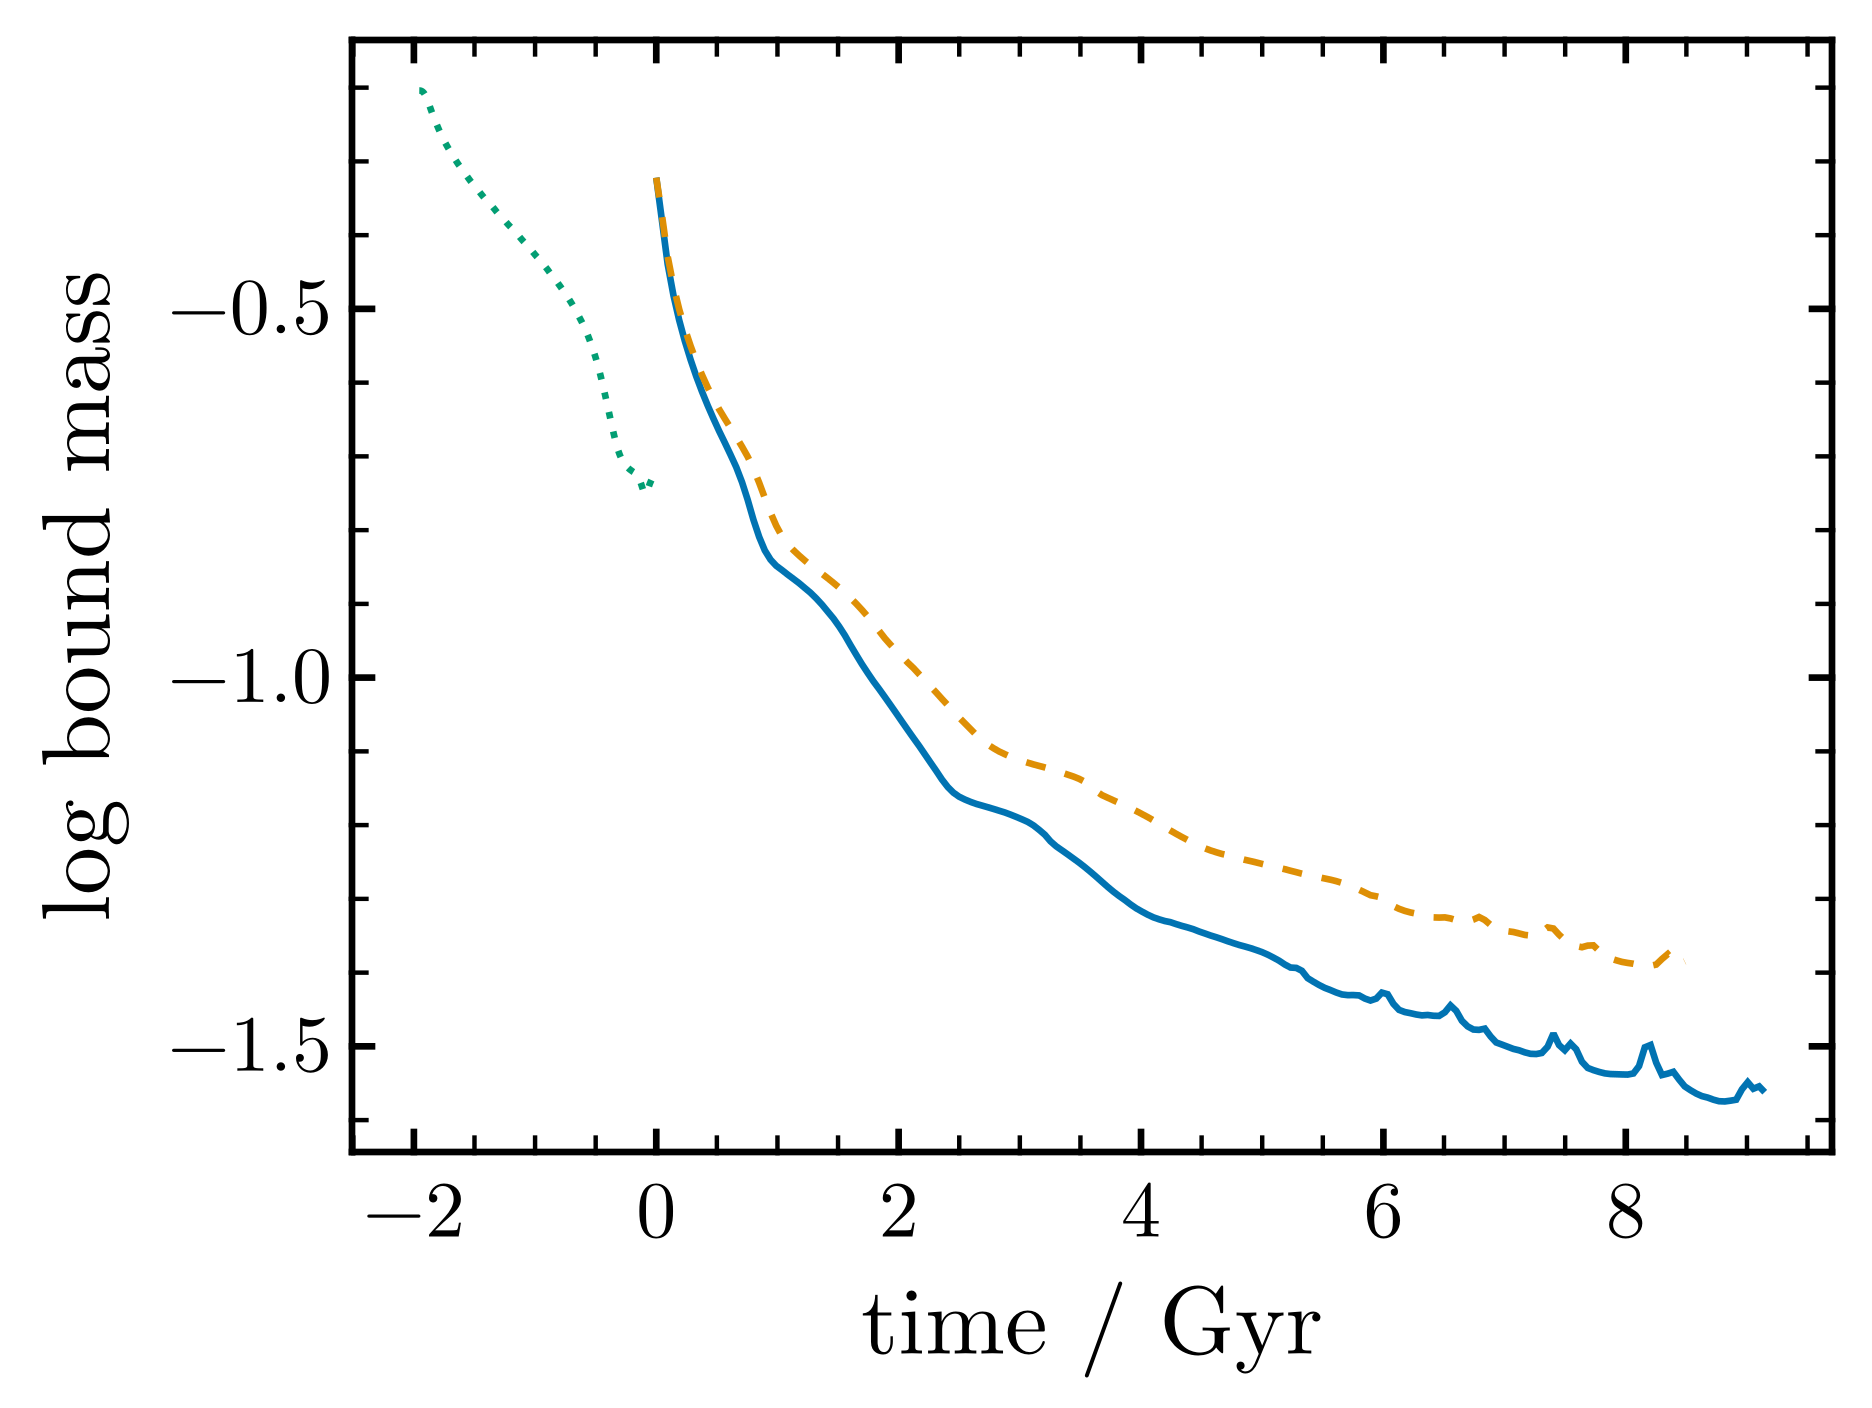

In [42]:
compare_boundmass_time(profiles, legend=false)

In [43]:
prof_i, prof_f = load_profiles("1e7_V31_r3.2/orbit_smallperi");

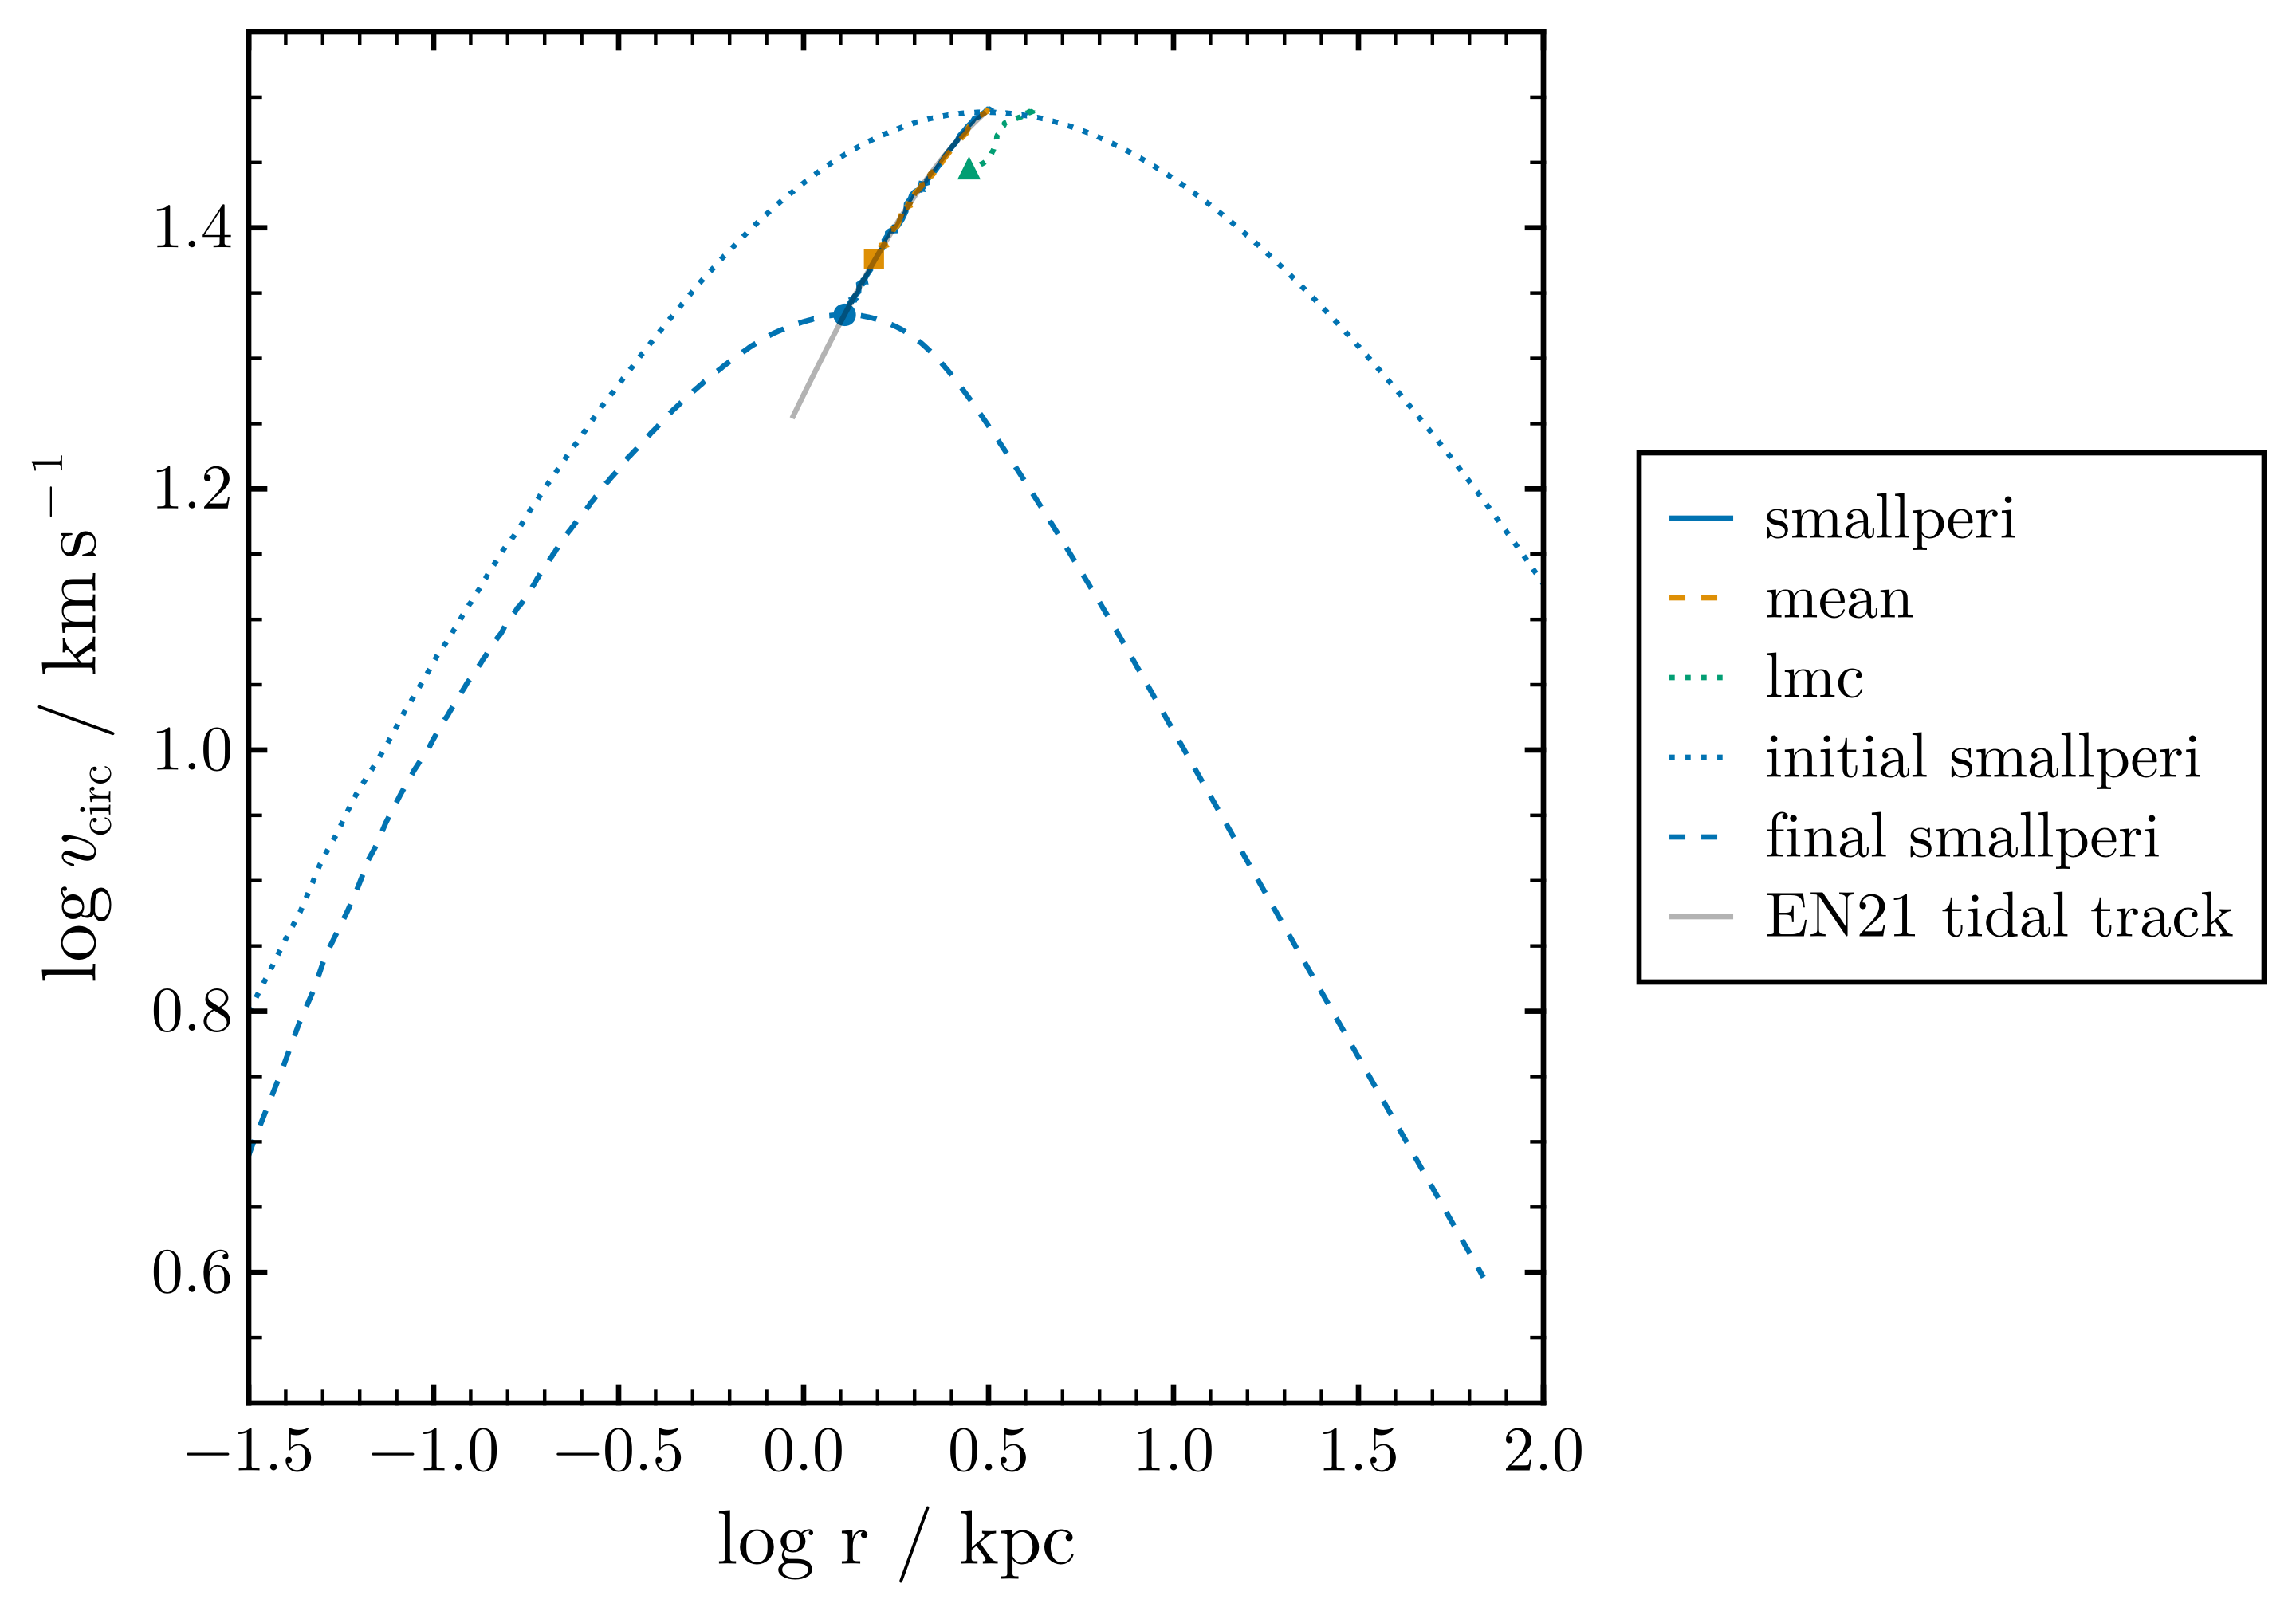

In [51]:
fig = compare_vcirc(profiles, legend=false)


prof = profiles[1].second

r_circ_tidal, v_circ_tidal = LilGuys.EN21_tidal_track(prof.r_circ_max[1], prof.v_circ_max[1], x_min=0.3)


lines!(log10.(prof_i.radii), log10.(LilGuys.circular_velocity(prof_i) * V2KMS), color=COLORS[1], linestyle=:dot, label="initial $(profiles[1].first)")
lines!(log10.(prof_f.radii), log10.(LilGuys.circular_velocity(prof_f) * V2KMS), color=COLORS[1], linestyle=:dash, label="final $(profiles[1].first)")

lines!(log10.(r_circ_tidal), log10.(v_circ_tidal * V2KMS), label = "EN21 tidal track", color=:black, alpha=0.3)


ylims!(0.5, 1.55)
xlims!(-1.5, 2)
Legend(fig[1,2], fig.content[1])
fig